In [1]:
# Clean Notebook
try:
    from IPython import get_ipython
    get_ipython().run_line_magic('clear', '')
    get_ipython().run_line_magic('reset', '-f')
except:
    pass

In [ ]:
# Libraries: 

import matplotlib.pyplot as plt 
import scipy.stats as stats
import seaborn as sns 
import pandas as pd 
import numpy as np 

In [5]:
# Data: 

# -> Square_footage: Size of the house in ft^2
# -> Num_bedrooms: Number of bedrooms of the housse 
# -> Year_built: Año en que se construyó 
# -> Lot_size: Size of the lot the house is built in acres
# -> Garage_size: Numbers of cars that fit in 
# -> Neighboorhood quality: 
# -> House price

data = pd.read_csv('house_price_regression_dataset.csv')
data.head(20)

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06
5,3944,5,3,1990,2.475930,2,8,8.797970e+05
6,3671,1,2,2012,4.911960,0,1,8.144279e+05
7,3419,1,1,1972,2.805281,1,1,7.034131e+05
8,630,3,3,1997,1.014286,1,8,1.738750e+05
9,2185,4,2,1981,3.941604,2,5,5.041765e+05


In [16]:
data.shape

(1000, 8)

In [6]:
# Initial EDA: 
descriptive_stats = data.describe()
descriptive_stats

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,1.973000,1986.550000,2.778087,1.022000,5.615000,6.188610e+05
std,1255.514921,1.427564,0.820332,20.632916,1.297903,0.814973,2.887059,2.535681e+05
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116269e+05
25%,1749.500000,2.000000,1.000000,1969.000000,1.665946,0.000000,3.000000,4.016482e+05
50%,2862.500000,3.000000,2.000000,1986.000000,2.809740,1.000000,6.000000,6.282673e+05
75%,3849.500000,4.000000,3.000000,2004.250000,3.923317,2.000000,8.000000,8.271413e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108237e+06


In [8]:
# Data Cleaning: 
null_counts = data.isnull().sum()
print("Null values on each column:\n", null_counts)

Null values on each column:
 Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64


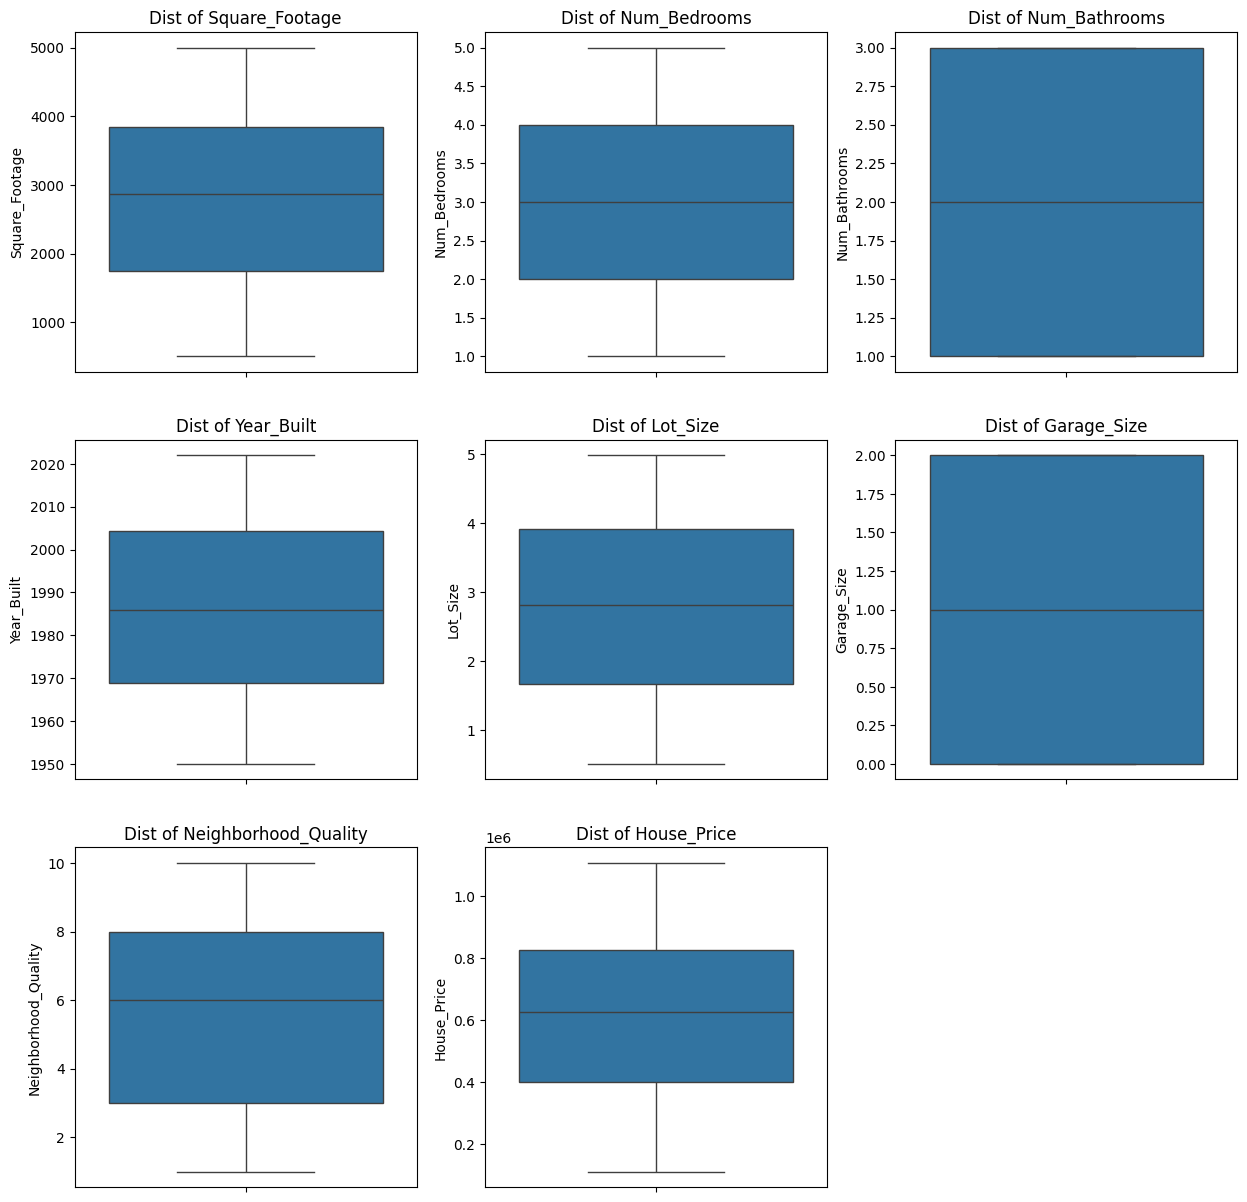

In [11]:
# Descriptive stats: 
# Box Plots -> To Detect important outliers
plt.figure(figsize=(15,15))
for i, column in enumerate(data.columns, 1):
    plt.subplot(3,3,i)
    sns.boxplot(y=data[column])
    plt.title(f'Dist of {column}')
    plt.tight_layout

plt.show()

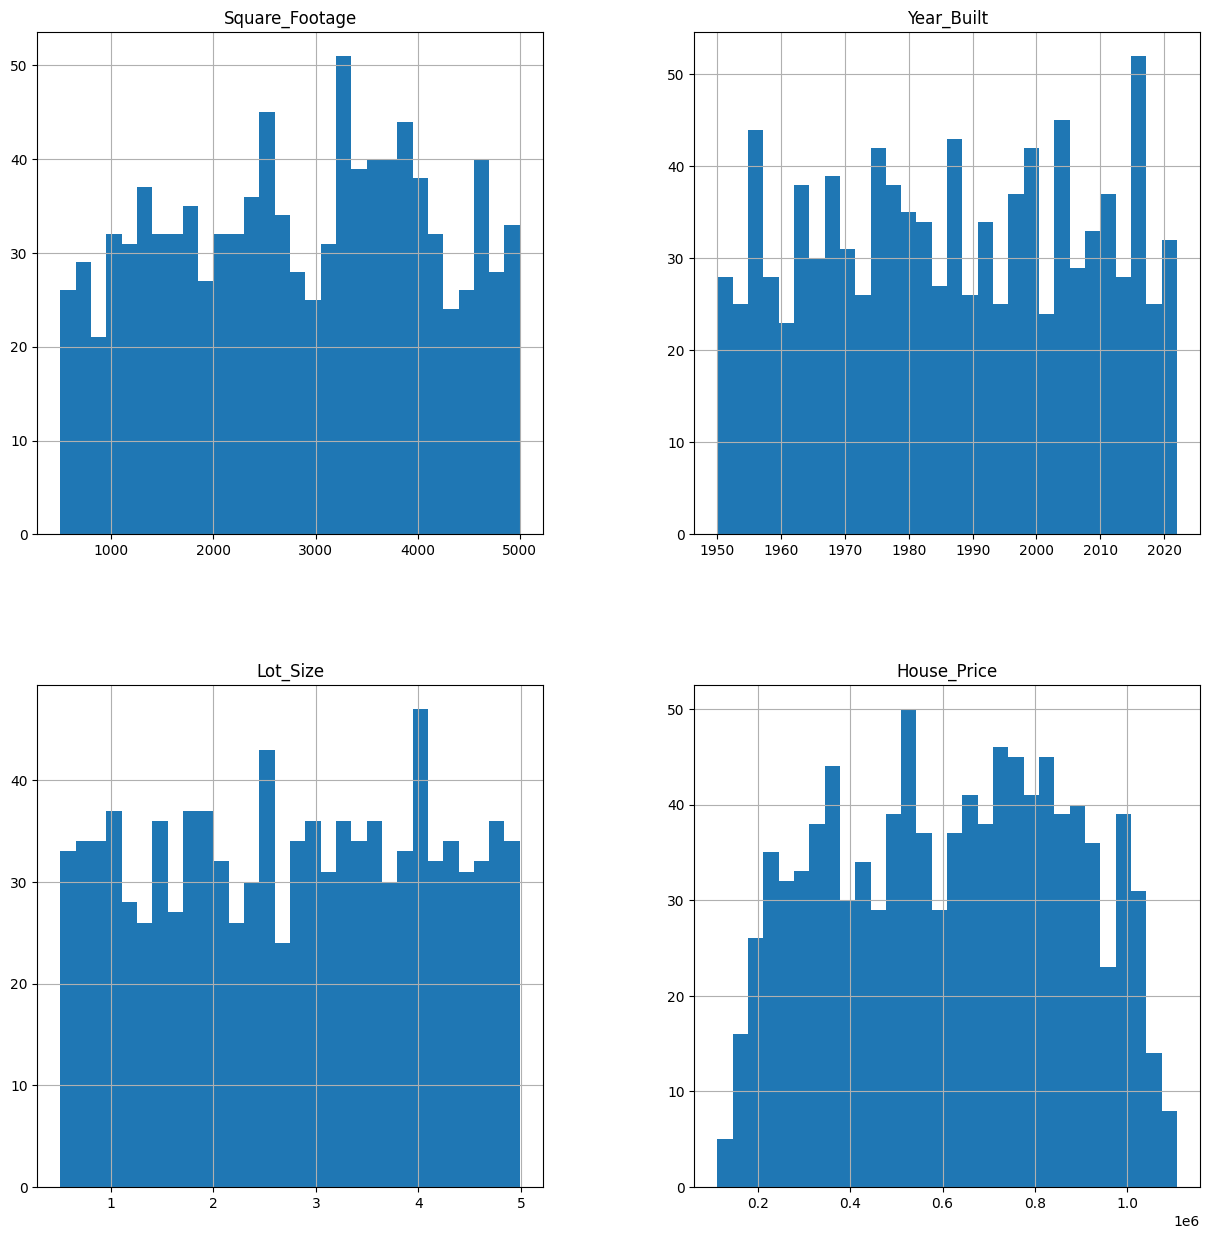

In [15]:
# Histograms: 
data_dist = data.drop(columns=['Num_Bedrooms', 'Num_Bathrooms', 'Garage_Size', 'Neighborhood_Quality'])


data_dist.hist(figsize=(15,15), bins=30)
plt.tight_layout
plt.show()

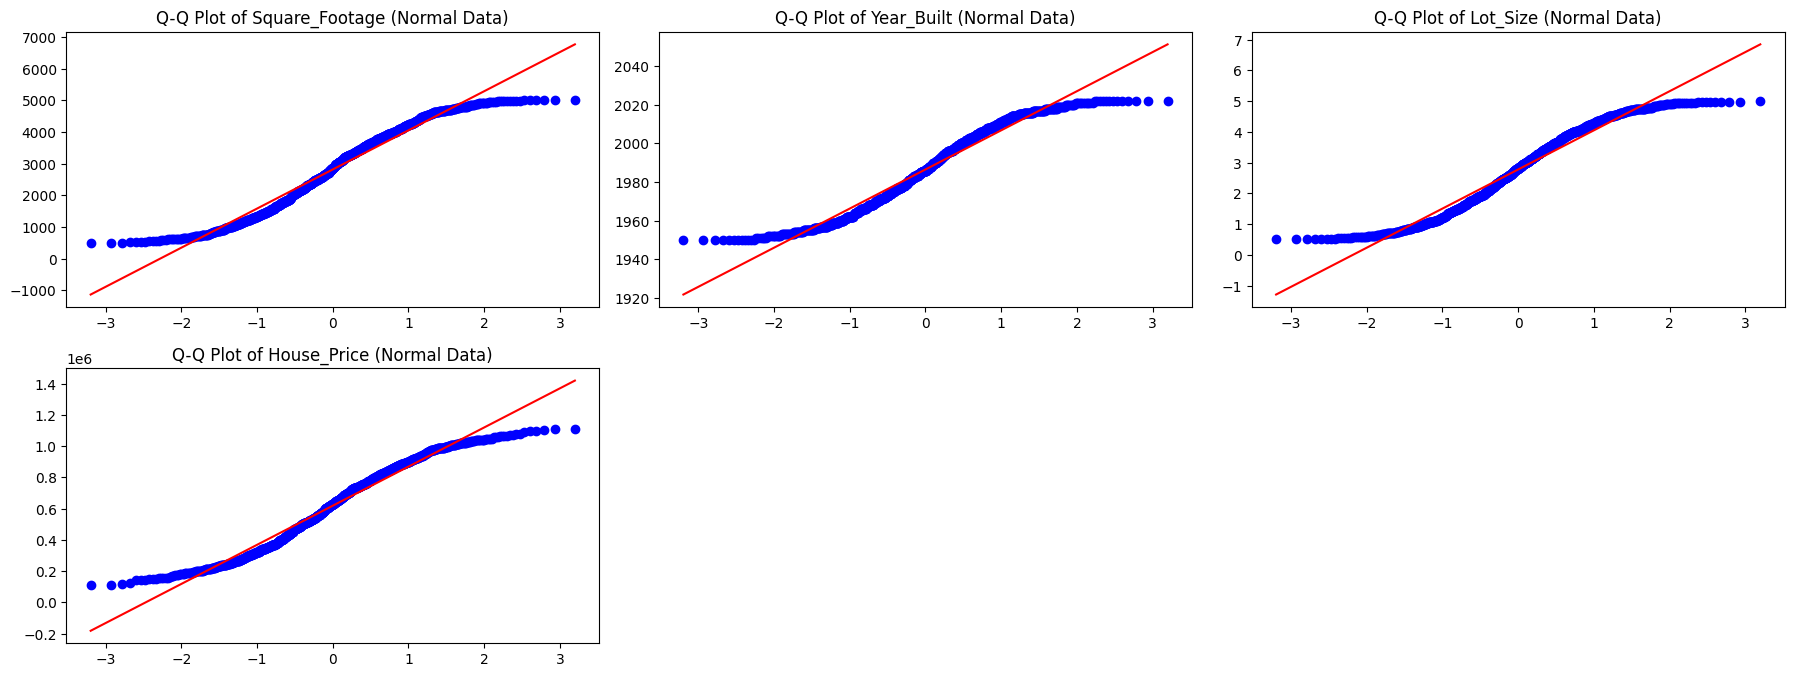

In [17]:
# QQ-Plots: 
def qq_plots(transformed_data, title): 
    plt.figure(figsize=(18,10))
    for i, column in enumerate(transformed_data.columns):
        plt.subplot(3, 3, i+1)
        stats.probplot(transformed_data[column], dist="norm", plot=plt)
        plt.title(f'Q-Q Plot of {column} ({title})')
        plt.xlabel('')
        plt.ylabel('')


    plt.tight_layout()
    plt.show()

qq_plots(data_dist, "Normal Data")

In [ ]:
# Normality Tests: 

# 1. Shaphiro-Wilk 
from scipy.stats import shapiro
normality_results = {}
for column in data_dist:
    stat, p_value = shapiro(data_dist[column])
    normality_results[column] = {'Statistic': stat,
                                 'p-value': p_value,
                                 'Normal': p_value > 0.05}

normality_df = pd.DataFrame(normality_results).T
print(normality_df)

# Kolmogorov-Smirnov 
from scipy.stats import kstest, norm
ks_results = {}
for column in data_dist:
    stat, p_value = kstest(data_dist[column], 'norm', args=(data_dist[column].mean(), data_dist[column].std()))
    ks_results[column] = {'Statistic': stat, 'p-value': p_value, 'Normal': p_value>0.05}

ks_df = pd.DataFrame(ks_results).T
print(ks_df)

# to test -> anderson-darling | d'agostino-pearrson(k2)

               Statistic p-value Normal
Square_Footage  0.961728     0.0  False
Year_Built      0.956451     0.0  False
Lot_Size          0.9544     0.0  False
House_Price     0.967161     0.0  False
               Statistic   p-value Normal
Square_Footage  0.059021  0.001805  False
Year_Built      0.070012  0.000105  False
Lot_Size        0.065843  0.000326  False
House_Price     0.060845  0.001164  False


In [24]:
# Homocedasticity -> Barlett Test
from scipy.stats import bartlett

df = data 
barlett_results = {}

for col1 in df.columns:
    for col2 in df.columns:
        if col1 != col2: 
            stat, p_value = bartlett(df[col1].dropna(), df[col2].dropna())
            barlett_results[f'{col1} vs {col2}'] = {'stat': stat, 'p_value': p_value}

for comparison, results in barlett_results.items(): 
    print(f'{comparison} - Statistic: {results["stat"]}, p_value: {results["p_value"]}')

# Most of the comparisons show that p is aprox 0.0 -> heteroscedasticity
# Bathrooms vs Garage Size: Null hyptesis is rejected
# this implies that we need to use a models that don't assumme homocedasticty -> robust models   

Square_Footage vs Num_Bedrooms - Statistic: 12154.116354779213, p_value: 0.0
Square_Footage vs Num_Bathrooms - Statistic: 13260.484582567567, p_value: 0.0
Square_Footage vs Year_Built - Statistic: 6820.827615982497, p_value: 0.0
Square_Footage vs Lot_Size - Statistic: 12344.268783538271, p_value: 0.0
Square_Footage vs Garage_Size - Statistic: 13273.57347691027, p_value: 0.0
Square_Footage vs Neighborhood_Quality - Statistic: 10747.698542766864, p_value: 0.0
Square_Footage vs House_Price - Statistic: 9216.085044418227, p_value: 0.0
Num_Bedrooms vs Square_Footage - Statistic: 12154.116354779213, p_value: 0.0
Num_Bedrooms vs Num_Bathrooms - Statistic: 291.9698623695694, p_value: 1.8507427522346802e-65
Num_Bedrooms vs Year_Built - Statistic: 3959.147120580651, p_value: 0.0
Num_Bedrooms vs Lot_Size - Statistic: 9.039459180017205, p_value: 0.002642137895961045
Num_Bedrooms vs Garage_Size - Statistic: 298.59238839055536, p_value: 6.674902025650428e-67
Num_Bedrooms vs Neighborhood_Quality - St